In [1]:
import numpy as np
import cv2 as cv2
import tensorflow as tf

from tqdm import tqdm 
import os

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [2]:
width = 256
num_class = 2

trainpath = 'Mold/TrainMold/'
testpath = '2Test11/'


trainImg = [trainpath + f for f in os.listdir(trainpath)]
testImg = [testpath + f for f in os.listdir(testpath)]

In [3]:
def img2data(path):
  rawImg = []
  label =[]
  for imagePath in (path):
    for item in tqdm(os.listdir(imagePath)):
      file = os.path.join(imagePath, item)

      l = imagePath.split('/')[1 ]
      if l == '11Ok':
        label.append([1,0])
      elif l == '11Bad':
        label.append([0,1])

      img = cv2.imread(file, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (width,width))
      rawImg.append(img)

  return rawImg, label

In [2]:
xtrain, ytrain = img2data(trainImg)
xtest, ytest = img2data(testImg)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

NameError: name 'img2data' is not defined

In [5]:
model1 = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width,width,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dense(16),
    keras.layers.Flatten(),
    keras.layers.Dense(num_class, activation='softmax')
])

model1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 32
epochs = 10

1/1 [==============================] - 0s 256ms/step
[[0.5952546  0.40474543]]
Ok (1).JPG
Ok


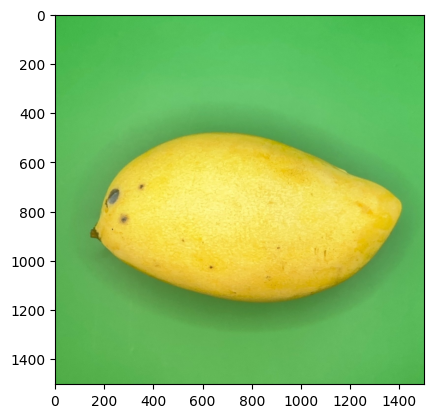

1/1 [==============================] - 0s 44ms/step
[[0.5577368  0.44226316]]
Ok (10).JPG
Ok


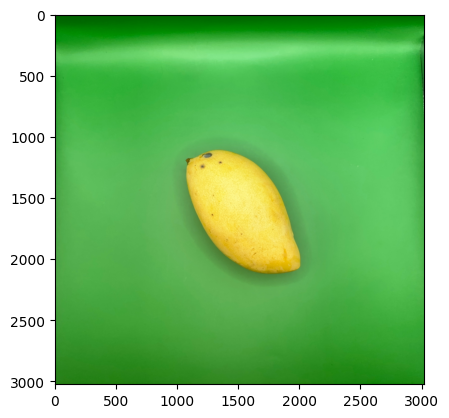

1/1 [==============================] - 0s 35ms/step
[[0.56762236 0.43237767]]
Ok (2).JPG
Ok


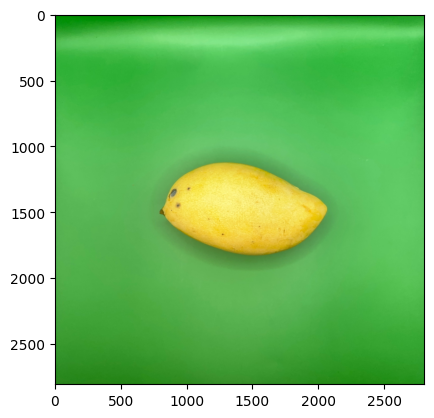

1/1 [==============================] - 0s 37ms/step
[[0.56556344 0.4344366 ]]
Ok (3).JPG
Ok


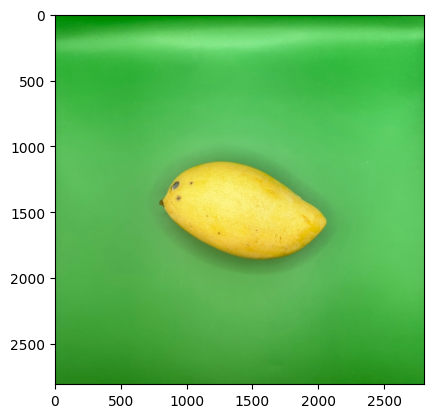

1/1 [==============================] - 0s 36ms/step
[[0.56388247 0.43611753]]
Ok (4).JPG
Ok


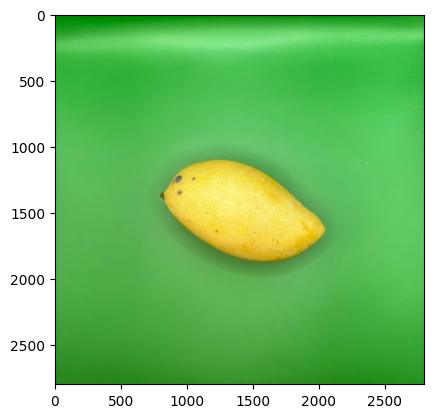

1/1 [==============================] - 0s 34ms/step
[[0.5642382 0.4357618]]
Ok (5).JPG
Ok


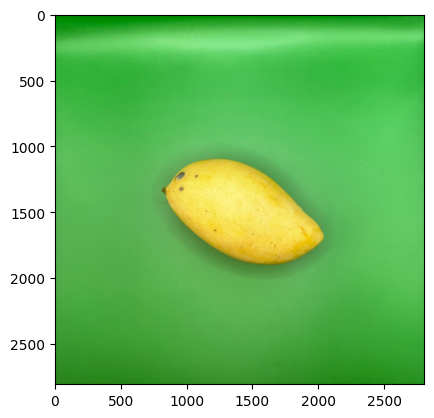

1/1 [==============================] - 0s 35ms/step
[[0.56508225 0.4349177 ]]
Ok (6).JPG
Ok


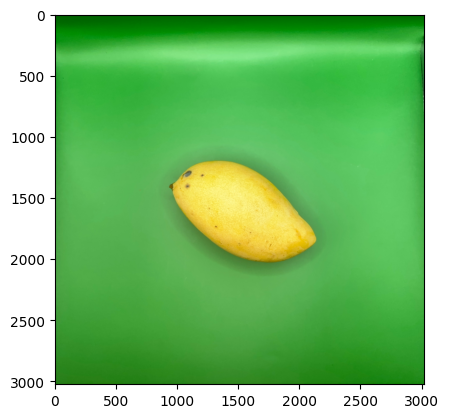

1/1 [==============================] - 0s 38ms/step
[[0.56393814 0.4360619 ]]
Ok (7).JPG
Ok


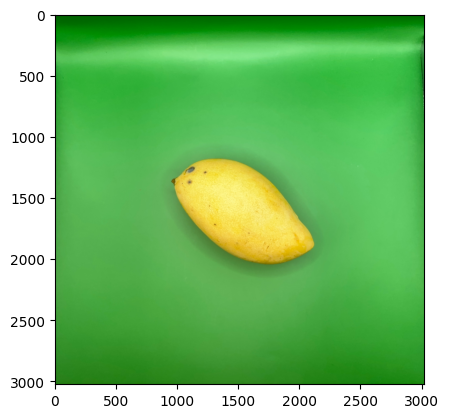

1/1 [==============================] - 0s 35ms/step
[[0.5624328  0.43756714]]
Ok (8).JPG
Ok


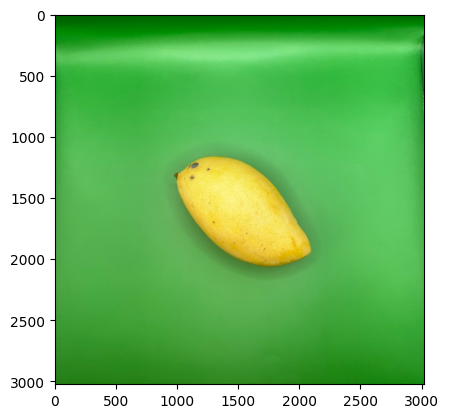

1/1 [==============================] - 0s 36ms/step
[[0.559627   0.44037306]]
Ok (9).JPG
Ok


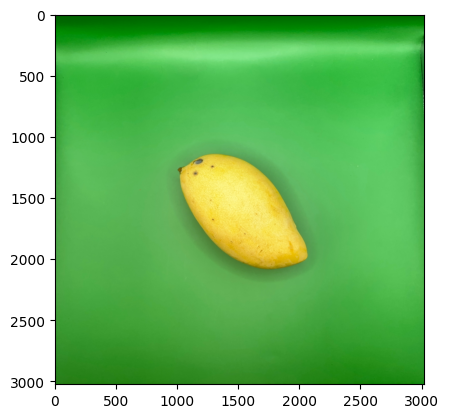

In [8]:
testPath = 'RandTest/'

testimg = [testPath +f for f in os.listdir(testPath)]
rimg = []

for imgPath in (testimg):
  for item in (os.listdir(imgPath)):
    file = os.path.join(imgPath, item)
    if item.split('.')[0] != "":
      
      img = cv2.imread(file, cv2.COLOR_BGR2RGB)
      ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (width,width))
      rimg = np.array(img)
      rimg = rimg.astype('float32')
      rimg /= 255
      rimg = np.reshape(rimg, (1,128,128,3))
      predict = model1.predict(rimg)
      label = ['Ok','Bad']
      result = label[np.argmax(predict)]

      print(predict)
      print(str(item))
      print(str(result))
      plt.imshow(ori)
      plt.show()